In [2]:
classes = ['neogurimild',
'neogurispicy',
'neoguriangry',
'gamjamyeon',
'jjawang',
'jjawangspicy',
'doongjibibim',
'doongjidongchimi',
'jinramenmild',
'jinramenspicy']

In [7]:
img_name = '1028my008887' # fix img_name
img_path = f'/opt/ml/new/final-project-level3-cv-12/dataset/Intuworks/dataset6_myeon/label/{img_name}.jpg' # fix img_path
label_path = f'/opt/ml/new/final-project-level3-cv-12/dataset/Intuworks/dataset6_myeon/label/{img_name}.txt' # fix label_path

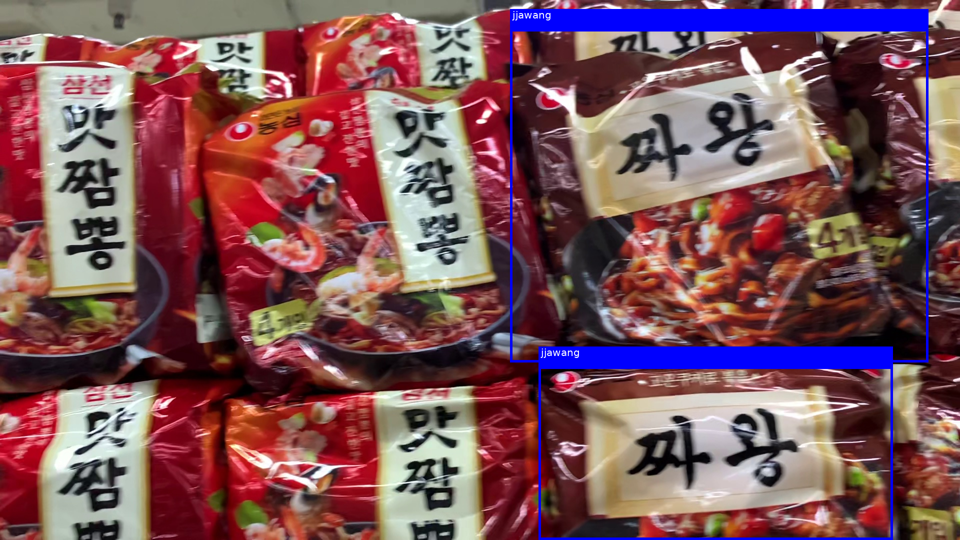

In [9]:
from PIL import Image, ImageDraw, ImageFont
img = Image.open(img_path)
width, height = img.size

font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSans.ttf", 20) # fix font
cate_color = {0: 'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'pink', 6:'brown', 7:'purple', 8:'navy', 9:'white'}
labels = open(label_path).read().splitlines()

for id in range(len(labels)):
    c, x, y, w, h = map(float, labels[id].split())
    c = int(c)
    name = classes[c]
    x = width * x
    y = height * y
    w = width * w
    h = height * h
    xmin, ymin, xmax, ymax = x-w//2, y-h//2, x+w//2, y+h//2
    draw = ImageDraw.Draw(img)
    draw.rectangle((xmin, ymin, xmax, ymax), outline=cate_color[c], width = 5)
    # text box는 bounding box 위에 그리기
    # 만약 bounding box위에 text box 그릴 수 없으면 안 쪽에 그리기
    y_pos = ymin-40
    if ymin < 40:
        y_pos = ymin
    draw.rectangle((xmin, y_pos, xmax, y_pos+40), fill=cate_color[c], width = 5)
    # text_color
    if int(c) in [1, 2, 5, 9]:
        text_color = 'black'
    else:
        text_color = 'white'
    # text 위치
    text_pos = (xmin+5, y_pos)
    draw.text(text_pos, f'{name}', fill=text_color, font=font)
img.resize((width//2, height//2))